# Chapter 2 Working with Networks in NetworkX

- **The Graph class**
- **Attributes**
- **Edge weights**
- **The DiGRaph class**
- **The MultiGraph and MultiDiGraph classes**

## The Graph class - undirected networks

In [1]:
import networkx as nx
import matplotlib.pyplot as plt 
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2 ** 32
nprand.seed(seed)
random.seed(seed)
plt.rcParams.update({'figure.figsize': (7.5, 7.5)})

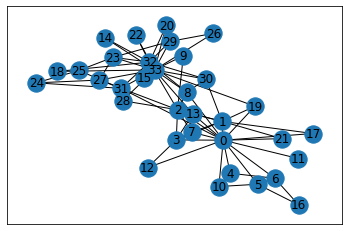

In [2]:
G = nx.karate_club_graph()
karate_pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, karate_pos)

In [3]:
list(G.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [4]:
list(G.edges)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]

In [5]:
mr_hi = 0
mr_hi in G

True

In [6]:
G.has_node(mr_hi)

True

In [7]:
wild_goose = 1337
wild_goose in G

False

In [8]:
G.has_node(wild_goose)

False

In [9]:
list(G.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [10]:
member_id = 1
(mr_hi, member_id) in G.edges

True

In [11]:
G.has_edge(mr_hi, member_id)

True

In [12]:
john_a = 33
(mr_hi, john_a) in G.edges

False

In [13]:
G.has_edge(mr_hi, john_a)

False

## Adding attributes to nodes and edges

In [14]:
member_club = [
0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1]

In [15]:
for node_id in G.nodes:
    G.nodes[node_id]['club'] = member_club[node_id]

In [16]:
G.add_node(11, club=0)

In [17]:
G.nodes[mr_hi]

{'club': 0}

In [18]:
G.nodes[john_a]

{'club': 1}

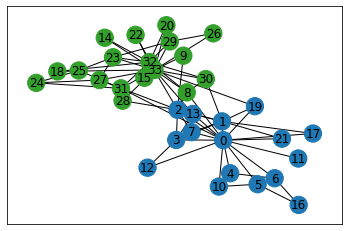

In [19]:
node_colors = ['#1f78b4' if G.nodes[v]['club'] == 0
              else '#33a02c' for v in G]
nx.draw_networkx(G, karate_pos, label = True, node_color = node_colors)

In [20]:
for v, w in G.edges:
    if G.nodes[v]['club'] == G.nodes[w]['club']:
        G.edges[v, w]["internal"] = True
    else:
        G.edges[v, w]["internal"] = False

In [21]:
internal = [e for e in G.edges if G.edges[e]["internal"]]
external = [e for e in G.edges if ~G.edges[e]["internal"]]

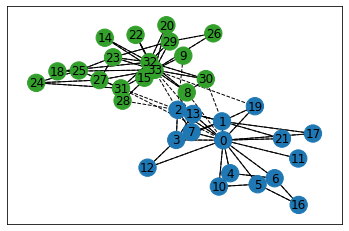

In [22]:
nx.draw_networkx_nodes(G, karate_pos, node_color = node_colors)
nx.draw_networkx_labels(G, karate_pos)
nx.draw_networkx_edges(G, karate_pos, edgelist=internal)
nx.draw_networkx_edges(G, karate_pos, edgelist=external, style='dashed')

## Adding edge weights

In [23]:
def tie_strength(G, v, w):
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    
    return 1 + len(v_neighbors & w_neighbors)

In [24]:
for v, w in G.edges:
    G.edges[v, w]['weight'] = tie_strength(G, v, w)
    edge_weights = [G.edges[v, w]['weight'] for v, w in G.edges]

In [25]:
weighted_pos = nx.spring_layout(G, pos=karate_pos, k = 0.3, weight='weight')

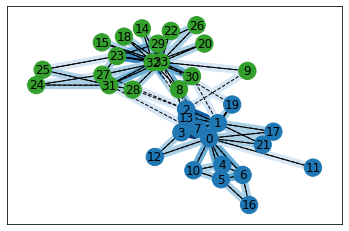

In [26]:
nx.draw_networkx(G, weighted_pos, width = 8, node_color = node_colors,
                edge_color = edge_weights, edge_cmap = plt.cm.Blues,
                edge_vmin = 0, edge_vmax = 6)
nx.draw_networkx_edges(G, weighted_pos, edgelist=internal)
nx.draw_networkx_edges(G, weighted_pos, edgelist=external, style='dashed')

## The DiGraph class – when direction matters

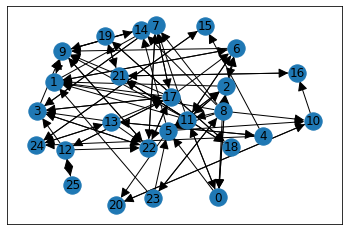

In [27]:
G = nx.read_gexf("../data/knecht2008/klas12b-net-1.gexf")
student_pos = nx.spring_layout(G, k = 1.5)
nx.draw_networkx(G, student_pos, arrowsize = 20)

In [28]:
list(G.neighbors('0'))

['2', '5', '11']

In [29]:
list(G.successors('0'))

['2', '5', '11']

In [30]:
list(G.predecessors('0'))

['2', '11', '8']

In [31]:
list(G.in_edges)

[('2', '0'),
 ('11', '0'),
 ('8', '0'),
 ('0', '2'),
 ('5', '2'),
 ('11', '2'),
 ('6', '2'),
 ('8', '2'),
 ('0', '5'),
 ('2', '5'),
 ('11', '5'),
 ('8', '5'),
 ('23', '5'),
 ('0', '11'),
 ('2', '11'),
 ('5', '11'),
 ('6', '11'),
 ('8', '11'),
 ('2', '1'),
 ('11', '1'),
 ('6', '1'),
 ('9', '1'),
 ('17', '1'),
 ('8', '1'),
 ('23', '1'),
 ('2', '6'),
 ('11', '6'),
 ('1', '6'),
 ('17', '6'),
 ('8', '6'),
 ('5', '10'),
 ('20', '10'),
 ('8', '10'),
 ('5', '14'),
 ('9', '14'),
 ('8', '14'),
 ('5', '20'),
 ('10', '20'),
 ('11', '7'),
 ('1', '7'),
 ('9', '7'),
 ('3', '7'),
 ('17', '7'),
 ('22', '7'),
 ('8', '7'),
 ('11', '9'),
 ('1', '9'),
 ('6', '9'),
 ('7', '9'),
 ('3', '9'),
 ('17', '9'),
 ('22', '9'),
 ('11', '21'),
 ('16', '21'),
 ('18', '21'),
 ('19', '21'),
 ('7', '3'),
 ('17', '3'),
 ('22', '3'),
 ('12', '3'),
 ('13', '3'),
 ('7', '17'),
 ('3', '17'),
 ('22', '17'),
 ('12', '17'),
 ('13', '17'),
 ('7', '22'),
 ('9', '22'),
 ('3', '22'),
 ('17', '22'),
 ('12', '22'),
 ('13', '22'),
 ('17

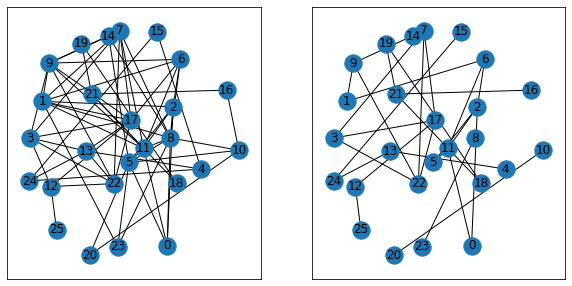

In [32]:
G_either = G.to_undirected()
G_both = G.to_undirected(reciprocal = True)

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
nx.draw_networkx(G_either, student_pos)

plt.subplot(1, 2, 2)
nx.draw_networkx(G_both, student_pos)

## MultiGraph and MultiDiGraph – parallel edges

In [33]:
G = nx.MultiGraph()
G.add_edges_from([
    ("North Bank", "Kneiphof", {"bridge": "Krämerbrücke"}),
    ("North Bank", "Kneiphof", {"bridge": "Schmiedebrücke"}),
    ("North Bank", "Lomse", {"bridge": "Holzbrücke"}),
    ("Lomse", "Kneiphof", {"bridge": "Dombrücke"}),
    ("South Bank", "Kneiphof", {"bridge": "Grüne Brücke"}),
    ("South Bank", "Kneiphof", {"bridge": "Köttelbrücke"}),
    ("South Bank", "Lomse", {"bridge": "Hohe Brücke"})
])

[0, 1, 0, 0, 0, 1, 0]

In [34]:
list(G.edges)[0]

('North Bank', 'Kneiphof', 0)

In [35]:
G.edges['North Bank', 'Kneiphof', 0]

{'bridge': 'Krämerbrücke'}

## Summary

## References